In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#1 Importing dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_set 2 - Copy.csv")

In [4]:
#1.1 Gathering information about the Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

Gender Distribution:
gender
Male      25
Female    15
Name: count, dtype: int64

Percentage:
gender
Male      62.5
Female    37.5
Name: count, dtype: float64


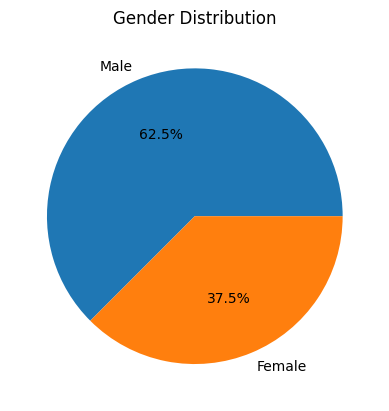

In [5]:
#2 Extract gender information
gender_counts = df['gender'].value_counts()

# Calculate the percentage of each gender
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Print the gender distribution and percentages
print("Gender Distribution:")
print(gender_counts)
print("\nPercentage:")
print(gender_percentages)

# Create a pie chart of the gender distribution
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()



In [6]:
#3 Identify numeric columns in dataframe

def identify_numeric_columns(df):
  numeric_columns = []
  for column in df.columns:
    if df[column].dtype in ["int64", "float64"]:
      numeric_columns.append(column)
  return numeric_columns

numeric_columns = identify_numeric_columns(df)
print("Numeric columns:", numeric_columns)


Numeric columns: ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']


In [7]:
#3.1 Calculating mean, median, standard deviation for all numerical columns in dataframe  separately

for col in numeric_columns:
  print(f"Column name: {col}")
  print(f"Mean: {df[col].mean():.2f}")
  print(f"Median: {df[col].median():.2f}")
  print(f"Standard deviation: {df[col].std():.2f}")
  print("\n")

Column name: age
Mean: 27.80
Median: 27.00
Standard deviation: 3.56


Column name: Mutual_Funds
Mean: 2.55
Median: 2.00
Standard deviation: 1.20


Column name: Equity_Market
Mean: 3.48
Median: 4.00
Standard deviation: 1.13


Column name: Debentures
Mean: 5.75
Median: 6.50
Standard deviation: 1.68


Column name: Government_Bonds
Mean: 4.65
Median: 5.00
Standard deviation: 1.37


Column name: Fixed_Deposits
Mean: 3.58
Median: 3.50
Standard deviation: 1.80


Column name: PPF
Mean: 2.02
Median: 1.00
Standard deviation: 1.61


Column name: Gold
Mean: 5.97
Median: 6.00
Standard deviation: 1.14




Most preferred investment option: Gold


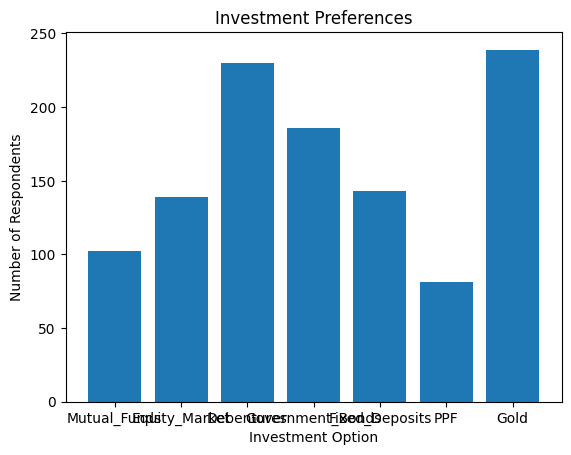

In [8]:
#4 Analyze 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold' and identify the most preferred

investment_options = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

# Calculate the number of respondents who prefer each investment option
investment_counts = df[investment_options].sum()

# Find the index of the most preferred investment option
most_preferred_index = investment_counts.idxmax()

# Print the most preferred investment option
print(f"Most preferred investment option: {most_preferred_index}")

# Create a bar chart of the investment preferences
plt.bar(investment_counts.index, investment_counts.values)
plt.xlabel("Investment Option")
plt.ylabel("Number of Respondents")
plt.title("Investment Preferences")
plt.show()


Assured Returns         26.0
Better Returns          24.0
Capital Appreciation    30.0
Dividend                 8.0
Fixed Returns           18.0
Fund Diversification    13.0
High Interest Rates      3.0
Liquidity                2.0
Risk Free               19.0
Safe Investment         13.0
Tax Benefits             3.0
Tax Incentives           1.0
dtype: float64


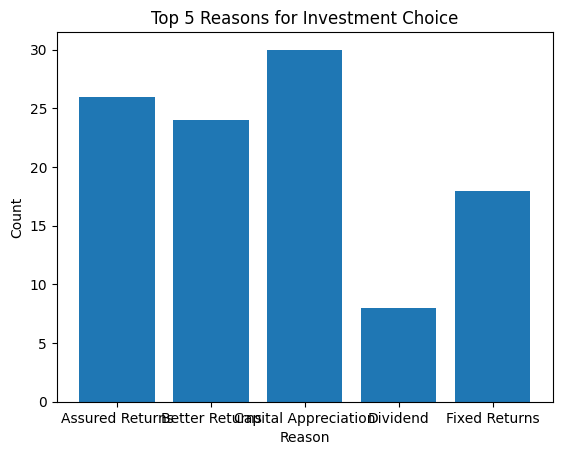

In [9]:
#5 analyze and summarise reasons for investment choice
import matplotlib.pyplot as plt

# Extract the reasons for investment choice
reasons = df[['Reason_Equity','Reason_Mutual','Reason_Bonds','Reason_FD']].apply(pd.value_counts).sum(axis=1)

# Select multiple columns using a list and apply value_counts to each column then sum across columns to get total counts for each reason.
print(reasons)

# Create a bar chart of the top 5 reasons for investment choice
plt.bar(reasons.index[:5], reasons.values[:5])
plt.xlabel("Reason")
plt.ylabel("Count")
plt.title("Top 5 Reasons for Investment Choice")
plt.show()



In [10]:
#5.1 Identify the most common reason for investment
most_common_reason = reasons.index[0]

# Print the most common reason for investment
print(f"Most common reason for investment: {most_common_reason}")

# Calculate the percentage of respondents who chose each reason
total_responses = len(df)
for reason, count in reasons.items():
  percentage = (count / total_responses) * 100
  print(f"{reason}: {percentage:.2f}%")

Most common reason for investment: Assured Returns
Assured Returns: 65.00%
Better Returns: 60.00%
Capital Appreciation: 75.00%
Dividend: 20.00%
Fixed Returns: 45.00%
Fund Diversification: 32.50%
High Interest Rates: 7.50%
Liquidity: 5.00%
Risk Free: 47.50%
Safe Investment: 32.50%
Tax Benefits: 7.50%
Tax Incentives: 2.50%


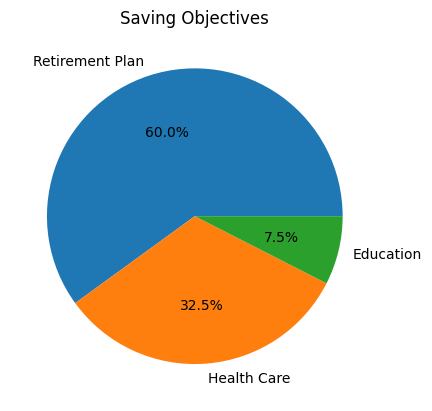

Most common saving objective: Retirement Plan


In [11]:
#6 Extract the saving objectives
saving_objectives = df['What are your savings objectives?'].value_counts()

# Create a pie chart of the saving objectives
plt.pie(saving_objectives, labels=saving_objectives.index, autopct="%1.1f%%")
plt.title("Saving Objectives")
plt.show()

# Identify the most common saving objective
most_common_objective = saving_objectives.index[0]

# Print the most common saving objective
print(f"Most common saving objective: {most_common_objective}")


Most Common Sources of Investment Information:
Source
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


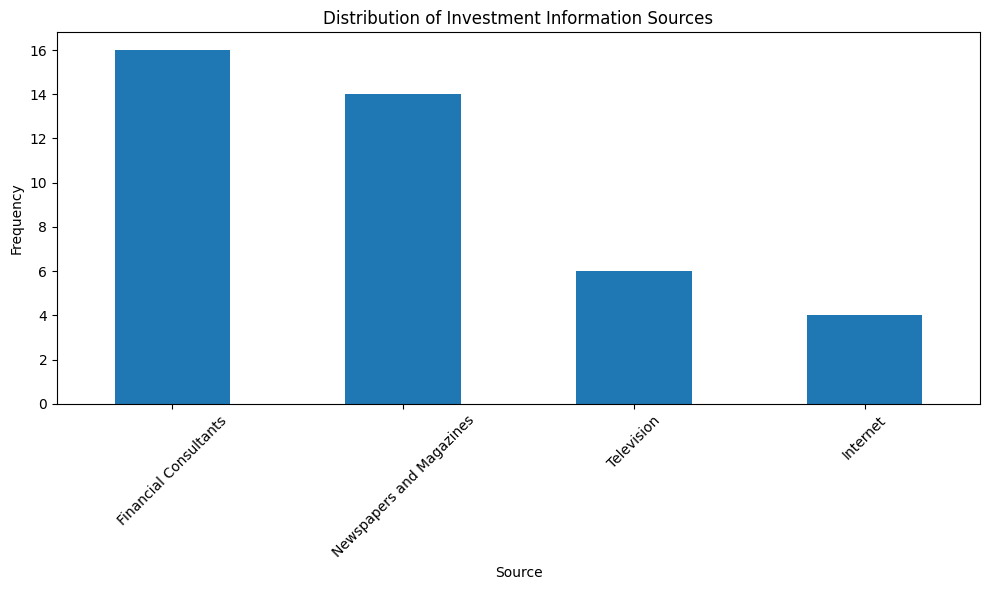

In [12]:
#7 Extract the columns for different sources of information
import matplotlib.pyplot as plt
column_name = 'Source'
# Check if the column exists in the dataset
if column_name in df.columns:
    # Get the frequency of each source
    source_counts = df[column_name].value_counts()

# Display the most common sources
    print("Most Common Sources of Investment Information:")
    print(source_counts)

# Plotting the distribution of the sources
    plt.figure(figsize=(10, 6))
    source_counts.plot(kind='bar')
    plt.title('Distribution of Investment Information Sources')
    plt.xlabel('Source')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{Source}' not found in the dataset.")



In [13]:
#8 Use appropiate statistical method to calculate average Duration

duration_mapping = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 6  # Or another appropriate value for durations beyond 5 years
}

# Map string values to numeric values for calculation
df['Duration_Numeric'] = df['Duration'].map(duration_mapping)

# Calculate the average duration using the mean
average_duration = df['Duration_Numeric'].mean()

# Calculate the average duration using the median
median_duration = df['Duration_Numeric'].median()

# Print the results
print(f"Average duration (mean): {average_duration:.2f}")
print(f"Average duration (median): {median_duration:.2f}")

Average duration (mean): 2.98
Average duration (median): 3.00


Common Expectations:
- 20%-30%
- 30%-40%
- 10%-20%


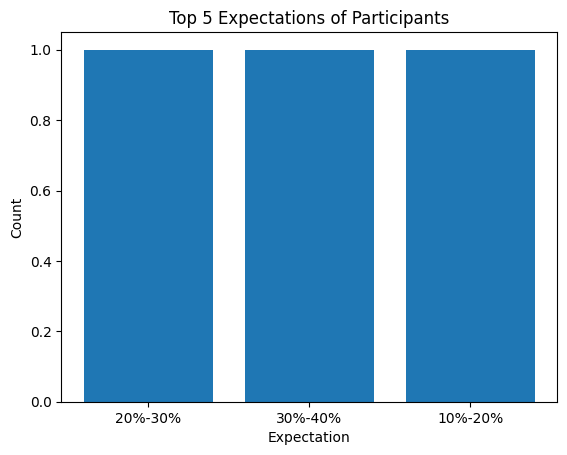

In [14]:
#9 Extract the common expectations mentioned by participants
expectations_list = []
for expectation in df['Expect'].str.split(','):
  for item in expectation:
    expectations_list.append(item.strip())

# Remove duplicates and empty strings
expectations_list = list(set(expectations_list))
expectations_list = [item for item in expectations_list if item]

# Print the list of common expectations
print("Common Expectations:")
for expectation in expectations_list:
  print(f"- {expectation}")

from collections import Counter
expectation_counts = Counter(expectations_list)

top_expectations = expectation_counts.most_common(5)
top_expectations = pd.Series(dict(top_expectations))

# Create a bar chart of the top 5 expectations
plt.bar(top_expectations.index, top_expectations.values)
plt.xlabel("Expectation")
plt.ylabel("Count")
plt.title("Top 5 Expectations of Participants")
plt.show()

Correlation Matrix:
                       age  Mutual_Funds  Equity_Market  Debentures  \
age               1.000000     -0.123914       0.246840    0.326638   
Mutual_Funds     -0.123914      1.000000       0.332043   -0.351495   
Equity_Market     0.246840      0.332043       1.000000   -0.016898   
Debentures        0.326638     -0.351495      -0.016898    1.000000   
Government_Bonds -0.093632     -0.114198      -0.237420    0.430323   
Fixed_Deposits   -0.033685     -0.031604      -0.238705   -0.470791   
PPF              -0.263167     -0.193665      -0.429003   -0.511169   
Gold             -0.057952     -0.401830      -0.050027   -0.137195   

                  Government_Bonds  Fixed_Deposits       PPF      Gold  
age                      -0.093632       -0.033685 -0.263167 -0.057952  
Mutual_Funds             -0.114198       -0.031604 -0.193665 -0.401830  
Equity_Market            -0.237420       -0.238705 -0.429003 -0.050027  
Debentures                0.430323       -0.4707

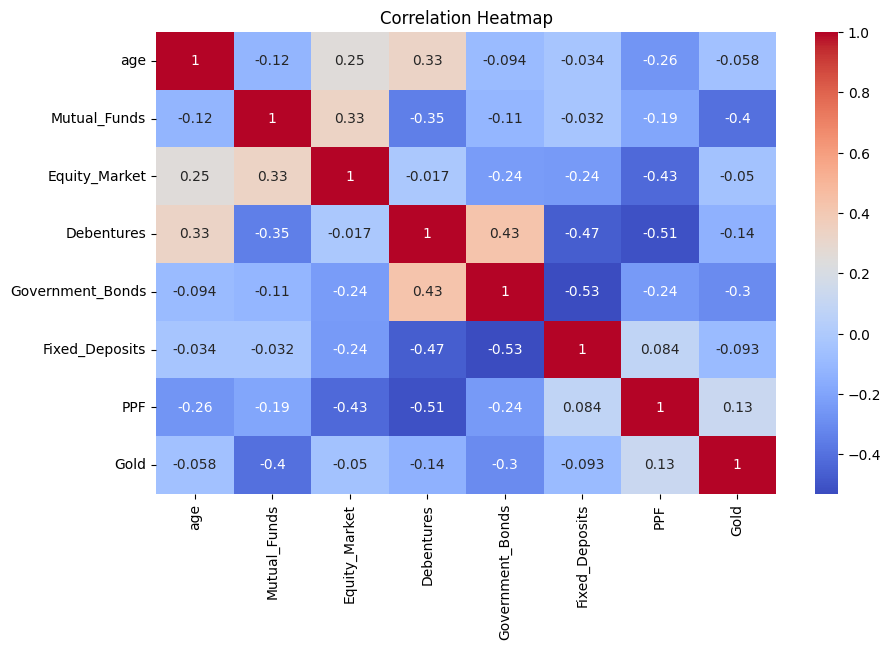

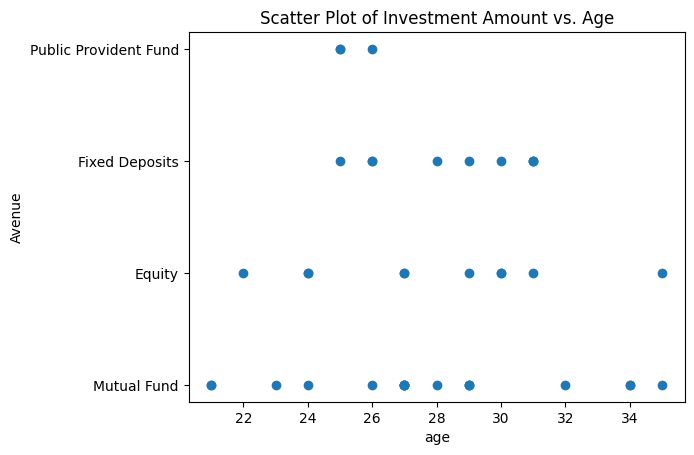

In [15]:
# prompt: #10 prompt: generate code Employ statistical methods (e.g., correlation coefficients) or visualizations (e.g., scatter plots) to explore and visualize potential correlations

import matplotlib.pyplot as plt
# Calculate the correlation coefficient between all numerical columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Select two numerical columns for further analysis
column1 = "age"
column2 = "Avenue"

# Create a scatter plot to visualize the relationship between the two columns
plt.scatter(df[column1], df[column2])
plt.xlabel(column1)
plt.ylabel(column2)
plt.title("Scatter Plot of Investment Amount vs. Age")
plt.show()

